# IF702 - Redes Neurais

#### Equipe
* Bruno César - bcgs
* Franclin Cabral - fcmo
* Ítalo Rodrigo Barbosa Paulino - irbp
* José Nilton de Oliveira Lima Júnior - jnolj

Este notebook contém os scripts executados em cada passo do projeto da disciplina de Redes Neurais.

In [0]:
!wget http://cin.ufpe.br/~gcv/web_lci/TRN

--2018-11-21 15:56:57--  http://cin.ufpe.br/~gcv/web_lci/TRN
Resolving cin.ufpe.br (cin.ufpe.br)... 150.161.2.9
Connecting to cin.ufpe.br (cin.ufpe.br)|150.161.2.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766723352 (731M) [application/vnd.rim.cod]
Saving to: ‘TRN’

TRN                  33%[=====>              ] 245.10M  12.5MB/s    eta 41s    ^C


## Leitura e limpeza dos dados
A leitura dos dados é feita utilizando a biblioteca pandas. Os trechos de código que seguem abaixo fazem a leitura do dataset de crédito "TRN" e a remoção de features que não nos interessam, mas estão presentes no dataset.

In [0]:
DATASET_PATH = "/content/gdrive/My Drive/Acadêmico/10º Período/Redes Neurais/Projeto/dataset/"
MODELS_PATH = "/content/gdrive/My Drive/Acadêmico/10º Período/Redes Neurais/Projeto/mlp_models/"

In [0]:
"""Only for google colab"""
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!pip3 install git+https://github.com/irbp/neuro-evolution.git
!pip3 install -U imbalanced-learn

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
"""Only for google colab"""
!wget http://cin.ufpe.br/~gcv/web_lci/TRN

--2018-11-19 23:37:32--  http://cin.ufpe.br/~gcv/web_lci/TRN
Resolving cin.ufpe.br (cin.ufpe.br)... 150.161.2.9
Connecting to cin.ufpe.br (cin.ufpe.br)|150.161.2.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 766723352 (731M) [application/vnd.rim.cod]
Saving to: ‘TRN’

TRN                 100%[===================>] 731.20M  9.48MB/s    in 2m 32s  

2018-11-19 23:40:06 (4.80 MB/s) - ‘TRN’ saved [766723352/766723352]



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

In [0]:
df = pd.read_table("TRN")
df.head()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0


## Divisão dos dados em treino, teste e validação

In [0]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, -2].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1/4,
                                                    random_state=42,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=1/3,
                                                  random_state=42,
                                                  stratify=y_train)

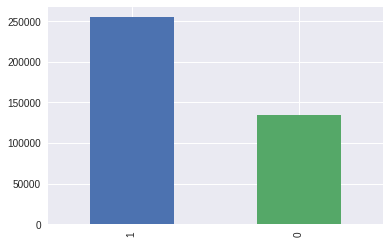

In [0]:
df["IND_BOM_1_1"].value_counts().plot.bar()

## Sampling dos dados e normalização

Como podemos ver no gráfico plotado acima, há um desbalanceamento entre as duas classes presentes no dataset. Para resolver este problema vamos utilizar uma técnica de oversampling bem simples que consiste em escolher algumas instâncias aleatórias da classe minoritária e replicá-las algumas vezes. Mas antes disso vamos normalizar a nossa base de dados. É interessante fazer a normalização antes do under/oversampling dos dados pois técnicas como o SMOTE fazem uso de algoritmos como o k-NN para gerar os samples, e estes obtém um melhor desempenho com dados normalizados.

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Agora vamos aplicar a técnica de oversampling nos conjuntos de treino, teste e validação, assim como verificar se a proporção está de 1/2 para cada classe dos conjuntos.

In [0]:
ros = RandomOverSampler(random_state=42)

# Oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
X_val, y_val = ros.fit_resample(X_val, y_val)

print("***Train***")
print(pd.value_counts(pd.Series(y_train), normalize=True))
print()
print("***Test***")
print(pd.value_counts(pd.Series(y_test), normalize=True))
print()
print("***Validation***")
print(pd.value_counts(pd.Series(y_val), normalize=True))

***Train***
1    0.5
0    0.5
dtype: float64

***Test***
1    0.5
0    0.5
dtype: float64

***Validation***
1    0.5
0    0.5
dtype: float64


## Seleção de features
Como o dataset apresenta bastante features se torna importante fazer uma análise de quais delas são realmente relevantes para representar o nosso problema. Features irrelevantes além tornar o tempo de treinamento maior também podem diminuir a acurácia do nosso modelo. Sendo assim, nos trechos abaixo vamos fazer uma análise de quais features são mais relevantes para representar o nosso problema.

In [0]:
from sklearn.decomposition import PCA

# Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)

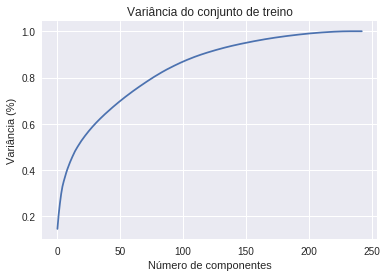

In [0]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variância (%)')
plt.title('Variância do conjunto de treino')
plt.show()

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.arange(X_train.shape[1])[cumsum >= 0.9][0] + 1

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

np.save(DATASET_PATH + "X_train.npy", X_train)
np.save(DATASET_PATH + "y_train.npy", y_train)
np.save(DATASET_PATH + "X_test.npy", X_test)
np.save(DATASET_PATH + "y_test.npy", y_test)
np.save(DATASET_PATH + "X_val.npy", X_val)
np.save(DATASET_PATH + "y_val.npy", y_val)

## Definição dos parâmetros da MLP

Pensando em obter os melhores parâmetros possíveis e ao mesmo tempo visando o desempenho, nós optamos por utilizar algoritmo genético, pois este apresenta resultado mais rápido do que o grid search. Ao invés de testar todas as possíveis combinações de hiperparâmetros, o algoritmo genético irá selecionar os melhores indivíduos onde cada indivíduo representa uma combinação de hiperparâmetros. A métrica de avaliação do indivíduo é a acurácia do conjunto de validação, ou seja, para cada indivíduo uma rede neural é criada e treinada utilizando os parâmetros que este indíviduo está codificando. Após treinada ela é avaliada e o resultado dessa avaliação é utilizado para saber quais indivíduos irão representar aquela geração e assim criar indivíduos ainda melhores.

Para isso nós estamos fazendo uso da bilioteca neuro-evolution (https://github.com/irbp/neuro-evolution), pois ela já apresenta tudo o que é necessário para realizarmos o que foi descrito acima.

In [0]:
from neuro_evolution.evolution import NeuroEvolution

params = {
    "batch_size": [1024],
    "n_layers": [1, 2, 3],
    "n_neurons": [256, 512, 1024],
    "dropout": [0.1, 0.25, 0.5],
    "optimizers": ["rmsprop", "adam"],
    "activations": ["relu", "sigmoid", "tanh"],
    "last_layer_activations": ["sigmoid"],
    "losses": ["binary_crossentropy"],
    "metrics": ["accuracy"],
    "verbose": [0]
}
search = NeuroEvolution(generations=10, population=10, params=params)
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [0]:
search.evolve(X_train, y_train, X_val, y_val, X_test, y_test)

  0%|          | 0/10 [00:00<?, ?it/s]

False


 10%|█         | 1/10 [00:19<02:51, 19.08s/it]

------ Accuracy: 0.636583874416429
False


 20%|██        | 2/10 [01:26<04:28, 33.59s/it]

------ Accuracy: 0.6364741116583649
False


 30%|███       | 3/10 [02:14<04:25, 37.91s/it]

------ Accuracy: 0.6405823690465751
False


 40%|████      | 4/10 [02:51<03:44, 37.50s/it]

------ Accuracy: 0.6335810832056579
False


 50%|█████     | 5/10 [03:33<03:14, 38.96s/it]

------ Accuracy: 0.6344043028004348
False


 60%|██████    | 6/10 [04:11<02:34, 38.63s/it]

------ Accuracy: 0.6357528145275804
False


 70%|███████   | 7/10 [04:40<01:47, 35.84s/it]

------ Accuracy: 0.6332204347701783
False


 80%|████████  | 8/10 [05:00<01:02, 31.08s/it]

------ Accuracy: 0.6281791951767973
False


 90%|█████████ | 9/10 [05:34<00:31, 31.97s/it]

------ Accuracy: 0.6380264685191122
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.5904287014432411
False


 10%|█         | 1/10 [00:41<06:10, 41.19s/it]

------ Accuracy: 0.6399394737181384
False


 20%|██        | 2/10 [01:01<04:39, 34.94s/it]

------ Accuracy: 0.6383165552294834
False


 30%|███       | 3/10 [01:19<03:28, 29.82s/it]

------ Accuracy: 0.635917458480556
False


 40%|████      | 4/10 [02:22<03:58, 39.81s/it]

------ Accuracy: 0.6409351773001376
False


 50%|█████     | 5/10 [02:48<02:58, 35.65s/it]

------ Accuracy: 0.6164345971693918
False


 60%|██████    | 6/10 [03:10<02:06, 31.52s/it]

------ Accuracy: 0.6359880202523956
False


 70%|███████   | 7/10 [03:24<01:19, 26.33s/it]

------ Accuracy: 0.6334164394153067
False


 80%|████████  | 8/10 [03:41<00:46, 23.44s/it]

------ Accuracy: 0.6272070123723359
False


 90%|█████████ | 9/10 [04:15<00:26, 26.64s/it]

------ Accuracy: 0.6168030858484737
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6383243954730855
False


 10%|█         | 1/10 [01:15<11:17, 75.23s/it]

------ Accuracy: 0.6382381535355518
False


 20%|██        | 2/10 [02:07<09:07, 68.41s/it]

------ Accuracy: 0.6408018942449317
False


 30%|███       | 3/10 [03:44<08:58, 76.88s/it]

------ Accuracy: 0.6369680433509289
False


 40%|████      | 4/10 [04:14<06:16, 62.79s/it]

------ Accuracy: 0.6357920156539983
False


 50%|█████     | 5/10 [04:36<04:12, 50.58s/it]

------ Accuracy: 0.6356116911783026
False


 60%|██████    | 6/10 [05:25<03:19, 50.00s/it]

------ Accuracy: 0.6407626933203923
False


 70%|███████   | 7/10 [06:16<02:30, 50.33s/it]

------ Accuracy: 0.6407626933708619
False


 80%|████████  | 8/10 [06:34<01:21, 40.73s/it]

------ Accuracy: 0.6358155360670332
False


 90%|█████████ | 9/10 [06:56<00:35, 35.07s/it]

------ Accuracy: 0.6336908457973592
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6408175745620348
False


 10%|█         | 1/10 [00:55<08:23, 55.98s/it]

------ Accuracy: 0.639876752182424
False


 20%|██        | 2/10 [01:44<07:09, 53.72s/it]

------ Accuracy: 0.6411625426262033
False


 30%|███       | 3/10 [02:30<06:00, 51.53s/it]

------ Accuracy: 0.6403785241148517
False


 40%|████      | 4/10 [03:25<05:15, 52.52s/it]

------ Accuracy: 0.6417740773166953
False


 50%|█████     | 5/10 [04:35<04:48, 57.62s/it]

------ Accuracy: 0.6391397748279988
False


 60%|██████    | 6/10 [05:06<03:18, 49.69s/it]

------ Accuracy: 0.6384027973763726
False


 70%|███████   | 7/10 [05:43<02:17, 45.79s/it]

------ Accuracy: 0.6379715871148453
False


 80%|████████  | 8/10 [06:11<01:21, 40.52s/it]

------ Accuracy: 0.6373443723670753
False


 90%|█████████ | 9/10 [06:47<00:39, 39.13s/it]

------ Accuracy: 0.6405980494758329
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6399786747006245
False


 10%|█         | 1/10 [00:44<06:39, 44.33s/it]

------ Accuracy: 0.640684291514306
False


 20%|██        | 2/10 [01:37<06:15, 46.89s/it]

------ Accuracy: 0.6408018942486703
False


 30%|███       | 3/10 [02:19<05:17, 45.41s/it]

------ Accuracy: 0.6408410951227401
False


 40%|████      | 4/10 [03:07<04:37, 46.33s/it]

------ Accuracy: 0.6416486342957362
False


 50%|█████     | 5/10 [04:06<04:10, 50.09s/it]

------ Accuracy: 0.6414761501608434
False


 60%|██████    | 6/10 [04:58<03:22, 50.71s/it]

------ Accuracy: 0.6419857621705105
False


 70%|███████   | 7/10 [05:48<02:31, 50.58s/it]

------ Accuracy: 0.6420092828938402
False


 80%|████████  | 8/10 [06:36<01:39, 49.54s/it]

------ Accuracy: 0.6414134287260683
False


 90%|█████████ | 9/10 [07:37<00:53, 53.04s/it]

------ Accuracy: 0.6408332548249298
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6402452411175925
False


 10%|█         | 1/10 [00:40<06:01, 40.20s/it]

------ Accuracy: 0.6392260168739488
False


 20%|██        | 2/10 [01:32<05:51, 43.90s/it]

------ Accuracy: 0.6401197980891564
False


 30%|███       | 3/10 [02:13<05:01, 43.01s/it]

------ Accuracy: 0.6383792767689362
False


 40%|████      | 4/10 [02:58<04:20, 43.45s/it]

------ Accuracy: 0.6407940539508599
False


 50%|█████     | 5/10 [03:45<03:42, 44.54s/it]

------ Accuracy: 0.6414212688575157
False


 60%|██████    | 6/10 [04:37<03:06, 46.71s/it]

------ Accuracy: 0.6422444884597697
False


 70%|███████   | 7/10 [05:24<02:21, 47.01s/it]

------ Accuracy: 0.640041396290547
False


 80%|████████  | 8/10 [06:08<01:31, 45.94s/it]

------ Accuracy: 0.6405039671395495
False


 90%|█████████ | 9/10 [06:51<00:45, 45.23s/it]

------ Accuracy: 0.6408724559158321
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6417897574823895
False


 10%|█         | 1/10 [00:54<08:06, 54.06s/it]

------ Accuracy: 0.6400492364219945
False


 20%|██        | 2/10 [01:49<07:16, 54.53s/it]

------ Accuracy: 0.640315802788493
False


 30%|███       | 3/10 [02:37<06:06, 52.41s/it]

------ Accuracy: 0.6398689120434995
False


 40%|████      | 4/10 [03:30<05:16, 52.74s/it]

------ Accuracy: 0.6408097344343259
False


 50%|█████     | 5/10 [04:20<04:18, 51.79s/it]

------ Accuracy: 0.6410684606114302
False


 60%|██████    | 6/10 [05:13<03:29, 52.37s/it]

------ Accuracy: 0.6402295605873954
False


 70%|███████   | 7/10 [06:05<02:36, 52.20s/it]

------ Accuracy: 0.6388418478310327
False


 80%|████████  | 8/10 [06:53<01:41, 50.83s/it]

------ Accuracy: 0.6398218710342437
False


 90%|█████████ | 9/10 [07:53<00:53, 53.65s/it]

------ Accuracy: 0.6413350269237205
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.6404490858362218
False


 10%|█         | 1/10 [00:45<06:49, 45.50s/it]

------ Accuracy: 0.6409508578303347
False


 20%|██        | 2/10 [01:34<06:13, 46.63s/it]

------ Accuracy: 0.641201743659159
False


 30%|███       | 3/10 [02:15<05:13, 44.78s/it]

------ Accuracy: 0.6405039670853413
False


 40%|████      | 4/10 [03:06<04:40, 46.73s/it]

------ Accuracy: 0.6406372502414864
False


 50%|█████     | 5/10 [04:03<04:09, 49.86s/it]

------ Accuracy: 0.6413507072987701
False


 60%|██████    | 6/10 [04:48<03:13, 48.36s/it]

------ Accuracy: 0.6406607709573392
False


 70%|███████   | 7/10 [05:26<02:16, 45.39s/it]

------ Accuracy: 0.6399002728440686
False


 80%|████████  | 8/10 [06:18<01:34, 47.08s/it]

------ Accuracy: 0.6418367986467927
False


 90%|█████████ | 9/10 [07:08<00:48, 48.25s/it]

------ Accuracy: 0.6412487846684148
False


  0%|          | 0/10 [00:00<?, ?it/s]

------ Accuracy: 0.641217423983739
False


 10%|█         | 1/10 [00:44<06:41, 44.66s/it]

------ Accuracy: 0.6400492364219945
False


 20%|██        | 2/10 [01:36<06:15, 46.95s/it]

------ Accuracy: 0.6410449398413693
False


 30%|███       | 3/10 [02:33<05:49, 49.87s/it]

------ Accuracy: 0.6402687616240897
False


 40%|████      | 4/10 [03:14<04:42, 47.11s/it]

------ Accuracy: 0.6386301628762782
False


 50%|█████     | 5/10 [03:56<03:48, 45.72s/it]

------ Accuracy: 0.640778373695442
False


 60%|██████    | 6/10 [04:45<03:06, 46.56s/it]

------ Accuracy: 0.6406450905318198
False


 70%|███████   | 7/10 [05:39<02:26, 48.93s/it]

------ Accuracy: 0.6397669896299768
False


 80%|████████  | 8/10 [06:28<01:37, 48.86s/it]

------ Accuracy: 0.6401354784679446
False


 90%|█████████ | 9/10 [07:23<00:50, 50.59s/it]

------ Accuracy: 0.6402295606958117
False


100%|██████████| 10/10 [08:11<00:00, 50.05s/it]

------ Accuracy: 0.6410135792613714
[20/Nov/2018 00:50:53] INFO - best accuracy: 0.6410449398413693, best params: {'batch_size': 1024, 'n_layers': 2, 'n_neurons': 256, 'dropout': 0.25, 'optimizers': 'adam', 'activations': 'sigmoid', 'last_layer_activations': 'sigmoid', 'losses': 'binary_crossentropy', 'metrics': 'accuracy', 'verbose': 0}


## Treino da MLP

Logo abaixo a arquitetura da nossa rede será definida utilizando os parâmetros escolhidos pelo algoritmo genético executado acima. Após definida a arquitetura, a rede será treinada utilizando o conjunto de treino e para ao early stopping será utilizado o conjunto de validação. Logo após o conjunto de teste será avaliado utilizando as métricas exigidas pelo projeto.

In [0]:
# !pip3 install scikit-plot

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

import scikitplot as skplt
import matplotlib
import matplotlib.pyplot as plt

In [0]:
def load_data():
    X_train = np.load(DATASET_PATH + "X_train.npy")
    y_train = np.load(DATASET_PATH + "y_train.npy")
    X_val = np.load(DATASET_PATH + "X_val.npy")
    y_val = np.load(DATASET_PATH + "y_val.npy")
    X_test = np.load(DATASET_PATH + "X_test.npy")
    y_test = np.load(DATASET_PATH + "y_test.npy")
    
    train_perm = np.random.permutation(X_train.shape[0])
    X_train, y_train = X_train[train_perm], y_train[train_perm]
    val_perm = np.random.permutation(X_val.shape[0])
    X_val, y_val = X_val[val_perm], y_val[val_perm]
    test_perm = np.random.permutation(X_test.shape[0])
    X_test, y_test = X_test[test_perm], y_test[test_perm]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [0]:
def create_model(input_dim, output_dim, params):
    n_layers = params["n_layers"]
    n_neurons = params["n_neurons"]
    dropout = params["dropout"]
    optimizer = params["optimizer"]
    activation = params["activation"]
    last_layer_activation = params["last_layer_activation"]
    loss = params["loss"]
    metrics = params["metrics"]
    
    model = Sequential()
    # Hidden layers
    for n in range(n_layers):
        if n == 0:
            model.add(Dense(n_neurons[n], activation=activation, input_dim=input_dim))
        else:
            model.add(Dense(n_neurons[n], activation=activation))
        if dropout != 0.0:
            model.add(Dropout(dropout))
    # Output layer
    model.add(Dense(output_dim, activation=last_layer_activation))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    return model

In [0]:
params = {
    "n_layers": 2,
    "n_neurons": [256, 256],
    "dropout": 0.25,
    "optimizer": "adam",
    "activation": "sigmoid",
    "last_layer_activation": "sigmoid",
    "loss": "binary_crossentropy",
    "metrics": ["accuracy"],
}
model = create_model(X_train.shape[1], 1, params)

In [0]:
history = model.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=10000,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(patience=5)])

Train on 255098 samples, validate on 127550 samples
Epoch 1/10000
255098/255098 [==============================] - 3s 10us/step - loss: 0.6663 - acc: 0.5980 - val_loss: 0.6447 - val_acc: 0.6287
Epoch 2/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6476 - acc: 0.6237 - val_loss: 0.6435 - val_acc: 0.6294
Epoch 3/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6443 - acc: 0.6264 - val_loss: 0.6425 - val_acc: 0.6297
Epoch 4/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6423 - acc: 0.6276 - val_loss: 0.6418 - val_acc: 0.6310
Epoch 5/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6412 - acc: 0.6293 - val_loss: 0.6403 - val_acc: 0.6320
Epoch 6/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6397 - acc: 0.6306 - val_loss: 0.6381 - val_acc: 0.6345
Epoch 7/10000
255098/255098 [==============================] - 2s 9us/step - loss: 0.6370 - acc: 0.63

## Predições no conjunto de teste

In [0]:
def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

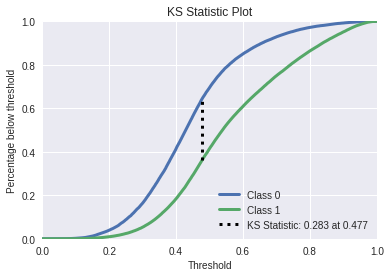


Accuracy:         0.6406
Recall:           0.5846
Precision:        0.6584
F1:               0.6193
AUROC:            0.6942
AUPR:             0.6923


In [0]:
# Fazer predições no conjunto de teste
y_pred_scores = model.predict(X_test)
y_pred_class = model.predict_classes(X_test, verbose=0)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## Ensemble de MLP's
Nosso próximo passo será criar um ensemble de MLP's para avaliarmos, para isso utilizaremos o método bagging. Várias redes serão treinadas de forma independentes utilizando subconjuntos do conjunto original de treino,  onde esse subconjuntos podem se sobrepôr. Além disso, cada subconjunto contém suas próprias features, ou seja, cada rede é treinada utilizando um conjuno de features definido de forma aleatória. Isso permite que cada rede consiga se "especializar" em características diferentes do dataset. No momento de avaliação cada rede neural é submetida ao conjunto de teste e suas predições são obtidas para compor a predição final do ensemble, onde esta predição final é definida pela maioria dos votos das redes.

In [0]:
def create_emsemble(n_models, instances_ratio, features_ratio, params):
    models = []
    features_idx = []
    for i in range(n_models):
        features = np.random.choice(range(X_train.shape[1]),
                                    round(X_train.shape[1] * features_ratio))
        
        _, xi_train, _, yi_train = train_test_split(X_train,
                                                    y_train,
                                                    test_size=instances_ratio,
                                                    random_state=42,
                                                    stratify=y_train)
        
        xi_train = xi_train[:, features]
        xi_val = X_val[:, features]
    
        model = create_model(xi_train.shape[1], 1, params)
        print()
        print("-----------------Training MLP {}-----------------".format(i))
        print()
        model.fit(xi_train, yi_train,
                  batch_size=1024,
                  epochs=10000,
                  validation_data=(xi_val, y_val),
                  callbacks=[EarlyStopping(patience=5)],
                  verbose=1)
        model.save_weights(MODELS_PATH + "model-{}.hdf5".format(i), overwrite=True)
        
        models.append(model)
        features_idx.append(features)
        
        # Avoiding memory issues
        K.clear_session()
        
    np.save(MODELS_PATH + "features.npy", np.array(features_idx))
        
    return models, features_idx

In [0]:
def evaluate_model(features_idx, params):
    predictions = []
    for i, f in enumerate(features_idx):
        xi_test = X_test[:, f]
        model = create_model(xi_test.shape[1], 1, params)
        model.load_weights(MODELS_PATH + "model-{}.hdf5".format(i))
        pred = model.predict(xi_test, batch_size=1024, verbose=1)
        predictions.append(pred)
        
        K.clear_session()
        
    pred_mean = np.round(np.array(predictions)[:,:,0].mean(axis=0))
    accuracy = pred_mean[pred_mean == y_test].shape[0] / X_test.shape[0]
    
    print("Accuray: {}".format(accuracy))

In [0]:
models, features = create_emsemble(20, 0.8, 0.5, params)


-----------------Training MLP 0-----------------

Train on 204078 samples, validate on 127550 samples
Epoch 1/10000
204078/204078 [==============================] - 2s 11us/step - loss: 0.6912 - acc: 0.5504 - val_loss: 0.6748 - val_acc: 0.5807
Epoch 2/10000
204078/204078 [==============================] - 2s 10us/step - loss: 0.6761 - acc: 0.5739 - val_loss: 0.6718 - val_acc: 0.5822
Epoch 3/10000
204078/204078 [==============================] - 2s 10us/step - loss: 0.6720 - acc: 0.5792 - val_loss: 0.6705 - val_acc: 0.5827
Epoch 4/10000
204078/204078 [==============================] - 2s 10us/step - loss: 0.6705 - acc: 0.5800 - val_loss: 0.6692 - val_acc: 0.5844
Epoch 5/10000
204078/204078 [==============================] - 2s 10us/step - loss: 0.6693 - acc: 0.5823 - val_loss: 0.6685 - val_acc: 0.5846
Epoch 6/10000
204078/204078 [==============================] - 2s 10us/step - loss: 0.6685 - acc: 0.5840 - val_loss: 0.6679 - val_acc: 0.5859
Epoch 7/10000
204078/204078 [================

In [0]:
evaluate_model(features, params)

127548/127548 [==============================] - 0s 2us/step
Accuray: 0.6367093172766332
